In [63]:
# Use the numpy library for dealing with arrays of floats:
import numpy as np

# The following import statement makes the plotting library available to us. There is also a mysterious
# statement to work around a known Jupyter bug: https://github.com/jupyter/notebook/issues/3670
%matplotlib inline
import matplotlib.pyplot as plt

# Use unit testing framework to test each function we write:
import unittest

In [64]:
#define the starting state of the economy
capital = 10000
depreciation_rate = 0.01
savings_rate = 0.25

#Define simulation time in years
simulation_time_steps = 100 
delta_t = 1.0 #time in years

#Define the production function of the economy
def prodFunct(K):
    output = 5*np.sqrt(K)
    return output

#Capital change
def depreciation(K):
    delta = K*depreciation_rate
    return delta

def investment(Y):
    I = Y*savings_rate
    return I

#CHEATZOR! DELETE!
print("Steady State Capital: " + str((savings_rate*5/depreciation_rate)**2))

Steady State Capital: 15625.0


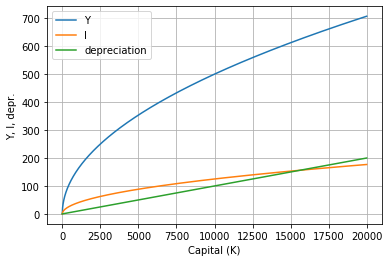

In [65]:
#plotting the change diagram
#Function of K!
Ks_to_plot = np.arange(0, 20000, 10)

Ys_to_plot = prodFunct(Ks_to_plot)
Is_to_plot = investment(Ys_to_plot)
depr_to_plot = depreciation(Ks_to_plot)


plt.plot(Ks_to_plot, Ys_to_plot)
plt.plot(Ks_to_plot, Is_to_plot)
plt.plot(Ks_to_plot, depr_to_plot)


plt.xlabel("Capital (K)")
plt.ylabel("Y, I, depr.")
plt.legend(("Y", "I", "depreciation"))
plt.grid()
plt.show()

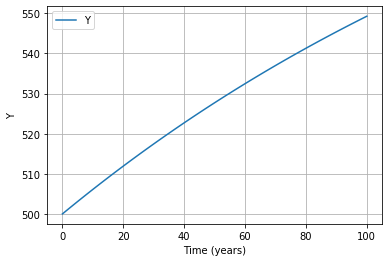

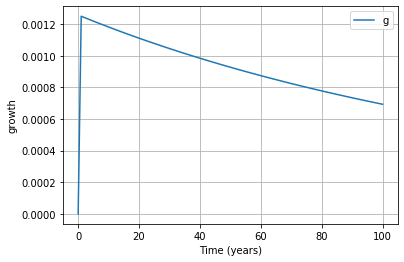

In [70]:
#Time trajectory of growth
sim_Y = np.zeros((simulation_time_steps + 1,))
sim_time = np.zeros((simulation_time_steps + 1,))
sim_K = np.zeros((simulation_time_steps + 1,))
sim_growth = np.zeros((simulation_time_steps + 1,))
sim_K[0] = capital
sim_Y[0] = prodFunct(capital)

for i in range(1, simulation_time_steps + 1):
    sim_K[i] = sim_K[i-1] + investment(sim_Y[i-1]) - depreciation(sim_K[i-1])
    sim_Y[i] = prodFunct(sim_K[i])
    sim_growth[i] = (sim_Y[i]-sim_Y[i-1])/sim_Y[i-1]
    sim_time[i] = sim_time[i-1]+delta_t
    
plt.plot(sim_time, sim_Y)

plt.xlabel("Time (years)")
plt.ylabel("Y")
plt.legend(("Y"))
plt.grid()
plt.show()

plt.plot(sim_time, sim_growth)

plt.xlabel("Time (years)")
plt.ylabel("growth")
plt.legend(("growth"))
plt.grid()
plt.show()
